<h1> BT4211 Project </h1>

Since hospitality operations are characterized by seasonality, it was decided to extract three full years of customer behavioral data: from 2015 to 2018. All time-based variables, such as when the customer was created in the database (DaysSinceCreation) or the number of days since the customer last stayed at the hotel (DaysSinceLastStay), are a construction based on the last day of extraction - <b> December 31, 2018.</b>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('HotelCustomersDataset.csv')

In [4]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [7]:
df.nunique().to_frame(name = 'No. of unique values')

,No. of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


In [8]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

<h2> Data Preprocessing </h2>

In [10]:
# Filter out negative/null ages and leadtimes as they're illogical in this context.
df = df[df['Age'] > 0] 
df = df[df['AverageLeadTime'] >= 0] 

In [11]:
# Presumably, the normal humnan lifespan lasts till a 100 years old and hence, we'll remove entries with > 100 years of age.
df = df[df['Age'] < 100]

# We'll also remove ID column since it just tracks the index of each booking.
# df.drop('ID', axis = 1, inplace = True)

In [12]:
df['TotalRevenue']  = df['LodgingRevenue'] + df['OtherRevenue']

In [13]:
df['DaysSinceCreation']

0         150
2        1095
3        1095
4        1095
5        1095
         ... 
83585       0
83586       0
83587       0
83588       0
83589       0
Name: DaysSinceCreation, Length: 79735, dtype: int64

In [14]:
# Note: Last date of Extraction is on 31 december 2018
date_val = pd.to_datetime('December 31, 2018')
df['datetime'] = date_val

In [15]:
#Calculating the customer's first booking creation date
df['entry_created_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceCreation'], unit = 'd')

#Calculating the customer's first stay
df['first_stay_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceFirstStay'], unit = 'd')

#Calculating the customer's last stay
df['last_stay_date'] = pd.to_datetime(df['datetime']) - pd.to_timedelta(df['DaysSinceLastStay'], unit = 'd')

In [16]:
df['BookingsCheckedIn'].unique()

array([ 3,  0,  1,  9, 11,  2,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10, 17,
       13, 26, 23, 12, 57, 40, 18, 14, 24, 20, 34], dtype=int64)

In [65]:
# My assumption is that this 1 account (NameHash) is responsible for making various bookings for different customers
df[df['DocIDHash'] == '0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA'][['NameHash','DistributionChannel','MarketSegment',
                                                                                            'Nationality','DocIDHash',
                                                                                            'first_stay_date', 'last_stay_date',
                                                                                            'DaysSinceFirstStay','DaysSinceLastStay',
                                                                                            'BookingsCheckedIn', 'Age', 'RoomNights',
                                                                                           'TotalRevenue']]

,NameHash,DistributionChannel,MarketSegment,Nationality,DocIDHash,first_stay_date,last_stay_date,DaysSinceFirstStay,DaysSinceLastStay,BookingsCheckedIn,Age,RoomNights,TotalRevenue
745,0x32C516CEF6E82ECE02E733A3A6DBBC6E36F77B703168...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-01-23,2016-01-23,1073,1073,1,39.0,4,508.0
843,0x73D4D9EDB1E9A0CC8F7E16F7FDBC3C609BD294932297...,Corporate,Corporate,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-01-30,2018-07-17,1066,167,3,47.0,3,254.0
908,0x2FAE495C677DE629D1FD1161848FC63A4DBB24FBDC2D...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-02-02,2016-02-02,1063,1063,1,32.0,1,80.0
1003,0xC0C4397874904E7BD8FF3B1324C83C49E5118F609EDE...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2016-02-04,2016-02-04,1061,1061,1,30.0,3,214.8
1004,0xFB4BABE3ACC598498E302B60CA3C7F3E4FE53287AF79...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,-1,0,29.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71704,0xDE2BCE177DBBB454E317C8B3CC46031643B70417C06A...,Travel Agent/Operator,Other,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2018-09-08,2018-09-08,114,114,1,20.0,3,507.0
72284,0xFCE8C2061463A2B0E9D387E69101D274E1ACC9A3F2D5...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,-1,0,58.0,0,0.0
76023,0x432982B6113589960DF22E881947D4B663D31D06BD4A...,Direct,Direct,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,-1,0,64.0,0,0.0
79940,0x5CF1DBDFEF3A0CC5FBAC0BF0A28ADDB3FE3FCFBAF3DD...,Travel Agent/Operator,Travel Agent/Operator,PRT,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2019-01-01,2019-01-01,-1,-1,0,43.0,0,0.0


In [35]:
#df.groupby('NameHash').filter(lambda x: len(x) > 1)

In [34]:
df.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
TotalRevenue            0
datetime                0
entry_created_date      0
first_stay_date         0
last_stay_date          0
dtype: int64

<h2> Exploratory Data Analysis </h2>

In [138]:
categorical_features = ['Nationality','DistributionChannel', 'MarketSegment']
numerical_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue','OtherRevenue', 'BookingsCanceled',
                      'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay',
                     'DaysSinceFirstStay','TotalRevenue'
                     ]
binary_features = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 
                   'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

In [45]:
#Number of unique customers
df['DocIDHash'].nunique()

76687

In [47]:
#Number of unique bookings
df['ID'].nunique()

79735

In [86]:
#Number of bookings made per customer
bookings_per_customer = df[['DocIDHash', 'NameHash']].groupby('DocIDHash').count()
bookings_per_customer.columns = ['num_of_bookings']
bookings_per_customer.reset_index(inplace = True)

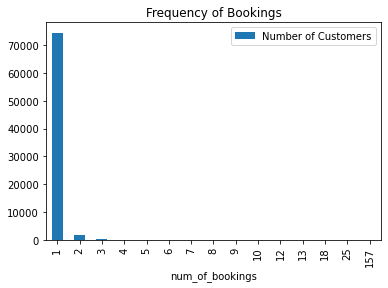

In [100]:
#Frequency of Booking
freq_bookings = bookings_per_customer.groupby('num_of_bookings').count()
freq_bookings.columns = ['Number of Customers']
freq_bookings.reset_index(inplace = True)
freq_bookings.plot(kind = 'bar', x ='num_of_bookings', y = 'Number of Customers')
plt.title('Frequency of Bookings')
plt.show()

In [92]:
freq_bookings

,num_of_bookings,Number of Customers
0,1,74459
1,2,1872
2,3,230
3,4,60
4,5,28
5,6,13
6,7,11
7,8,4
8,9,2
9,10,2


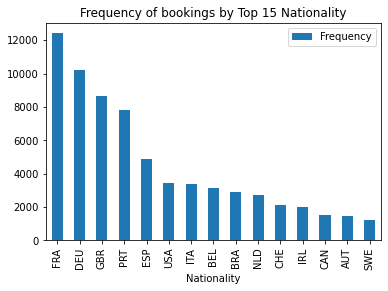

In [161]:
bookings_per_nationality = df[['DocIDHash', 'Nationality']].groupby('Nationality').count().sort_values(by = 'DocIDHash', ascending = False).head(15)
bookings_per_nationality.columns = ['Frequency']
bookings_per_nationality.plot(kind = 'bar')
plt.title('Frequency of bookings by Top 15 Nationality')
plt.show()

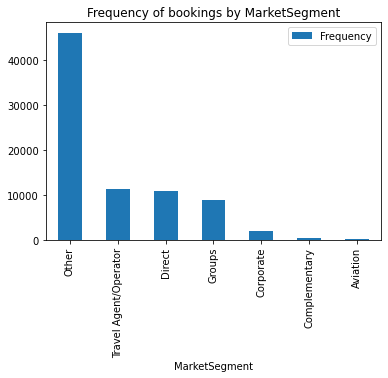

In [160]:
bookings_per_marketsegment = df[['DocIDHash', 'MarketSegment']].groupby('MarketSegment').count().sort_values(by = 'DocIDHash', ascending = False)
bookings_per_marketsegment.columns = ['Frequency']
bookings_per_marketsegment.plot(kind = 'bar')
plt.title('Frequency of bookings by MarketSegment')
plt.show()

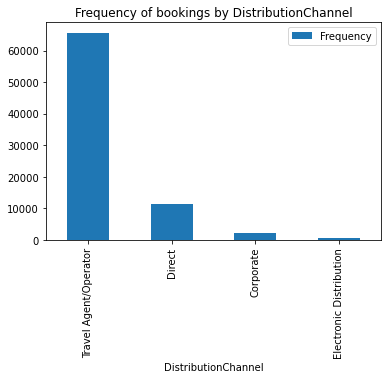

In [158]:
bookings_per_channel = df[['DocIDHash', 'DistributionChannel']].groupby('DistributionChannel').count().sort_values(by = 'DocIDHash', ascending = False)
bookings_per_channel.columns = ['Frequency']
bookings_per_channel.plot(kind = 'bar')
plt.title('Frequency of bookings by DistributionChannel')
plt.show()

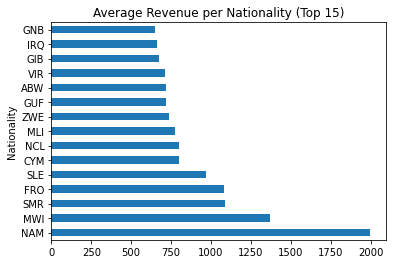

In [164]:
#Revenue by Nationalities
revenue_per_segment = df[['TotalRevenue', 'Nationality']].groupby('Nationality').mean().sort_values(by = 'TotalRevenue', ascending = False).head(15)
revenue_per_segment.plot(kind = 'barh', legend = False)
plt.title('Average Revenue per Nationality (Top 15)')
plt.show()

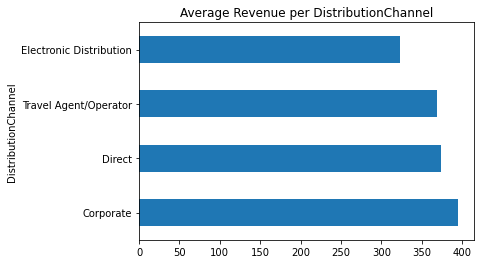

In [165]:
#Revenue by Channels
revenue_per_segment = df[['TotalRevenue', 'DistributionChannel']].groupby('DistributionChannel').mean().sort_values(by = 'TotalRevenue', ascending = False)
revenue_per_segment.plot(kind = 'barh', legend = False)
plt.title('Average Revenue per DistributionChannel')
plt.show()

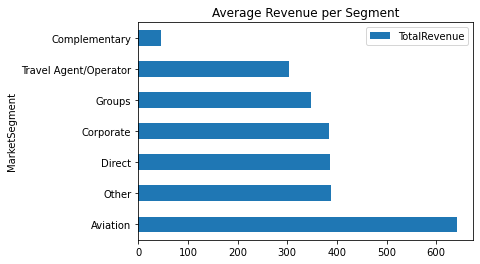

In [166]:
#Revenue by Segments
revenue_per_segment = df[['TotalRevenue', 'MarketSegment']].groupby('MarketSegment').mean().sort_values(by = 'TotalRevenue', ascending = False)
revenue_per_segment.plot(kind = 'barh')
plt.title('Average Revenue per Segment')
plt.show()